In [4]:
import torch.nn.functional as F

In [10]:
words = open('names.txt', 'r').read().splitlines()

In [11]:
len(words)

32033

In [12]:
import torch

In [13]:
N = torch.zeros((27,27), dtype = torch.int32)

In [14]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [15]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

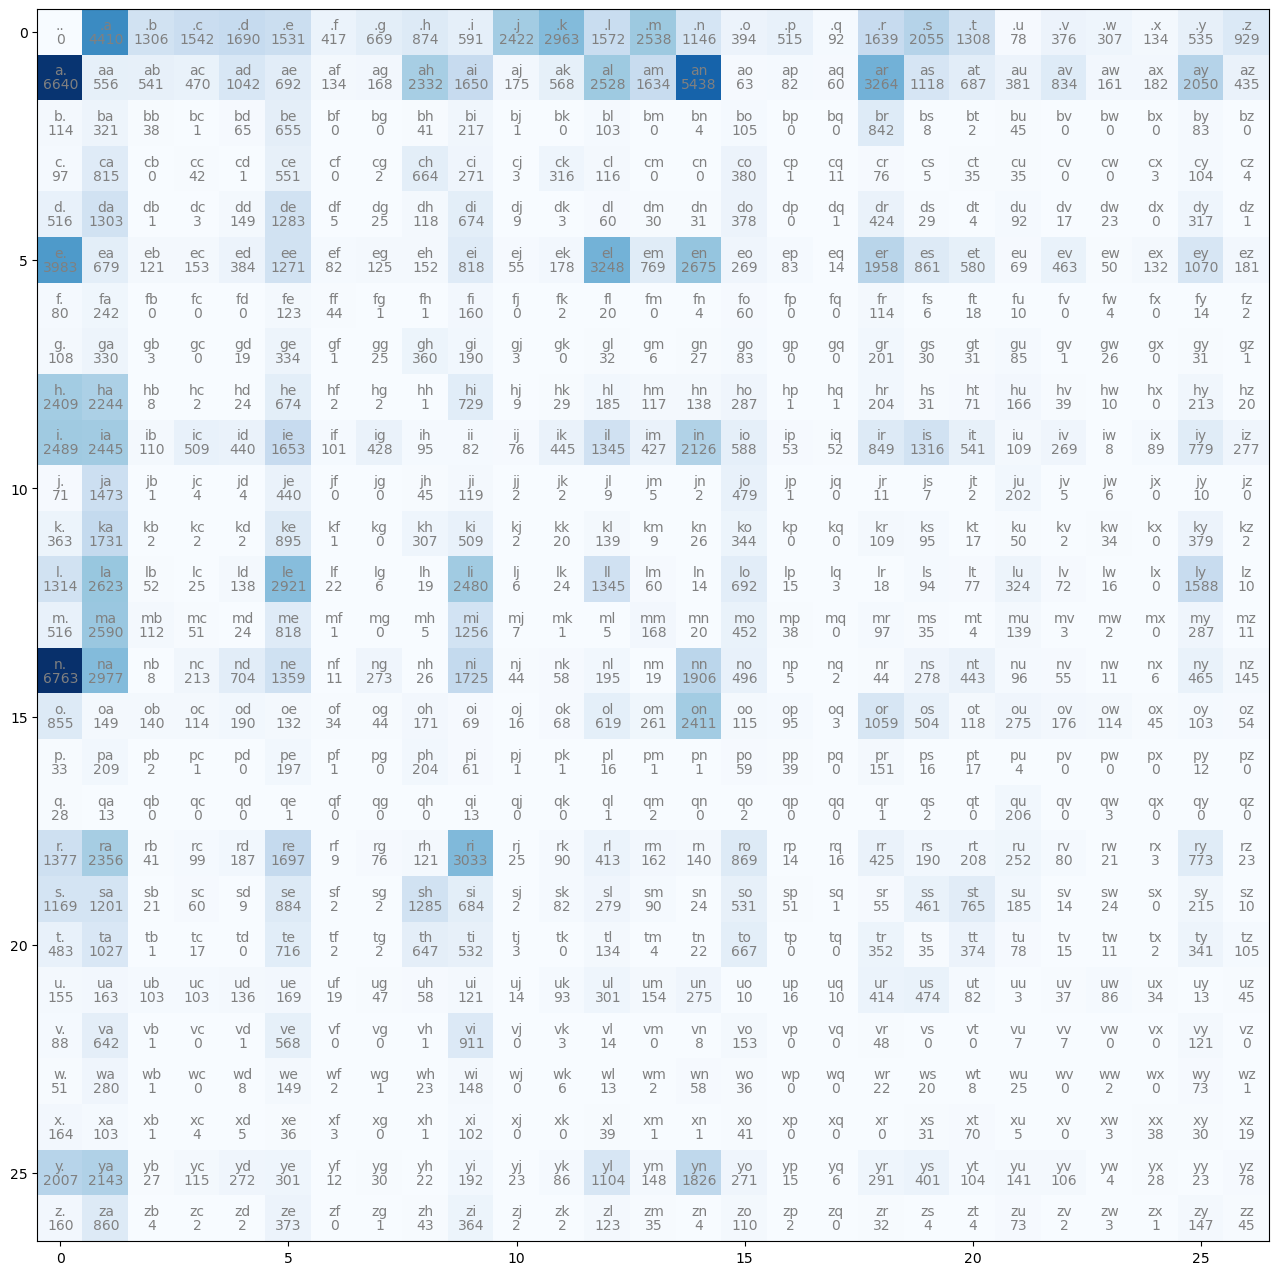

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (16,16))
plt.imshow(N, cmap = 'Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = "center", va = "bottom", color = 'gray')
        plt.text(j, i, N[i,j].item(), ha = "center", va = "top", color = 'gray')

# plt.axis("off")

In [245]:
p = N[0].float()
p = p/p.sum()

In [247]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
itos[ix]

'c'

In [248]:
P = (N+1).float()
P /= P.sum(1,True)

In [249]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    ix = 0
    str = ''
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        str = str + itos[ix]
        if ix == 0:
            break
    print(str)


cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


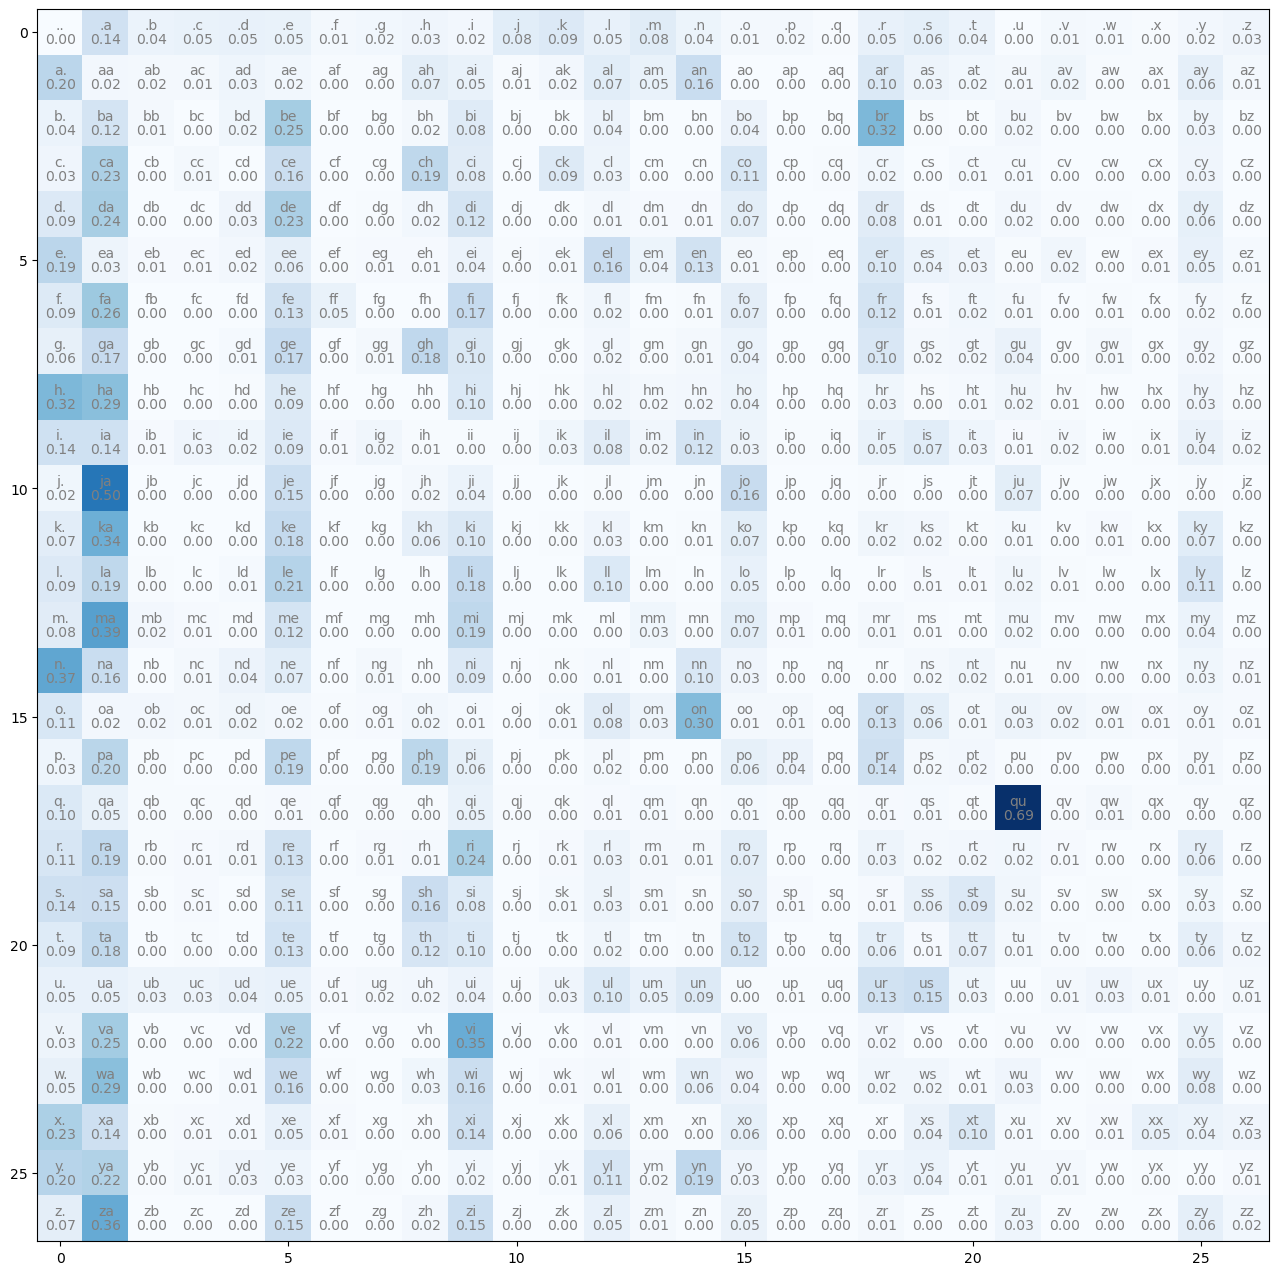

In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (16,16))
plt.imshow(P, cmap = 'Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = "center", va = "bottom", color = 'gray')
        plt.text(j, i, f'{P[i, j].item():.2f}', ha = "center", va = "top", color = 'gray')

# plt.axis("off")

In [41]:
log_likelihood = 0.0
n=0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        print(f'{ch1}{ch2}: {prob: .4f}: {logprob: .4f}')
        n+=1

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')
         

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [222]:
# create a training set of bigrams (x,y)

xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

num = xs.nelement()
print('number of examples: ', num)

# inititalize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g, requires_grad = True)

number of examples:  228146


In [260]:
# gradient descent

for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes = 27).float() #one-hot encoding of inputs characters
    logits = xenc @ W #interpreting outputs of neurons as log-counts of the N matrix
    # Notes:
    # The above 2 lines of code can be replaced by logits = W[xs]. Both code returns the ith row of W for 'i' in xs. i is nominal value of characters.
    counts = logits.exp() #equivalent of N matrix
    probs = counts / counts.sum(1, True) #equivalent of P matrix
    # the last 2 lines here together is called 'softmax' (often used to make outputs of linear neural networks probabilities)
    # Notes:
    #  1. The operation 'softmax' i. e. exponentiating the output and dividing by the sum, helps in getting rid of negative and 0 values which can not be in a probability distribution
    #  2. Other operations like (logits+1)**2 also remove zero and negative values and yield a mathematically valid way of creating a prob distribution.
    #  3. However 'gradient descent' is much more efficient if softmax is used.
    loss = -probs[torch.arange(num),ys].log().mean()
    print(loss.item())
    
    # backward pass
    W.grad = None
    loss.backward()
    
    # update
    W.data += -50*W.grad

2.45782470703125
2.4578137397766113
2.457803249359131
2.4577927589416504
2.457782030105591
2.4577715396881104
2.45776104927063
2.4577507972717285
2.457740068435669
2.4577298164367676
2.457719564437866
2.457709550857544
2.4576995372772217
2.4576892852783203
2.457679271697998
2.457669258117676
2.4576594829559326
2.4576494693756104
2.457639455795288
2.457629919052124
2.457620143890381
2.4576101303100586
2.4576005935668945
2.4575910568237305
2.4575815200805664
2.4575722217559814
2.4575624465942383
2.457552909851074
2.4575438499450684
2.4575345516204834
2.4575252532958984
2.4575161933898926
2.4575068950653076
2.4574978351593018
2.457488775253296
2.45747971534729
2.457470417022705
2.4574618339538574
2.4574530124664307
2.457443952560425
2.457435131072998
2.4574263095855713
2.4574177265167236
2.457408905029297
2.45740008354187
2.4573915004730225
2.457383155822754
2.4573745727539062
2.4573662281036377
2.45735764503479
2.4573493003845215
2.457340955734253
2.4573326110839844
2.457324504852295
2.4

In [220]:
probs[torch.arange(num),ys].shape

torch.Size([228146])

(-0.5, 26.5, 26.5, -0.5)

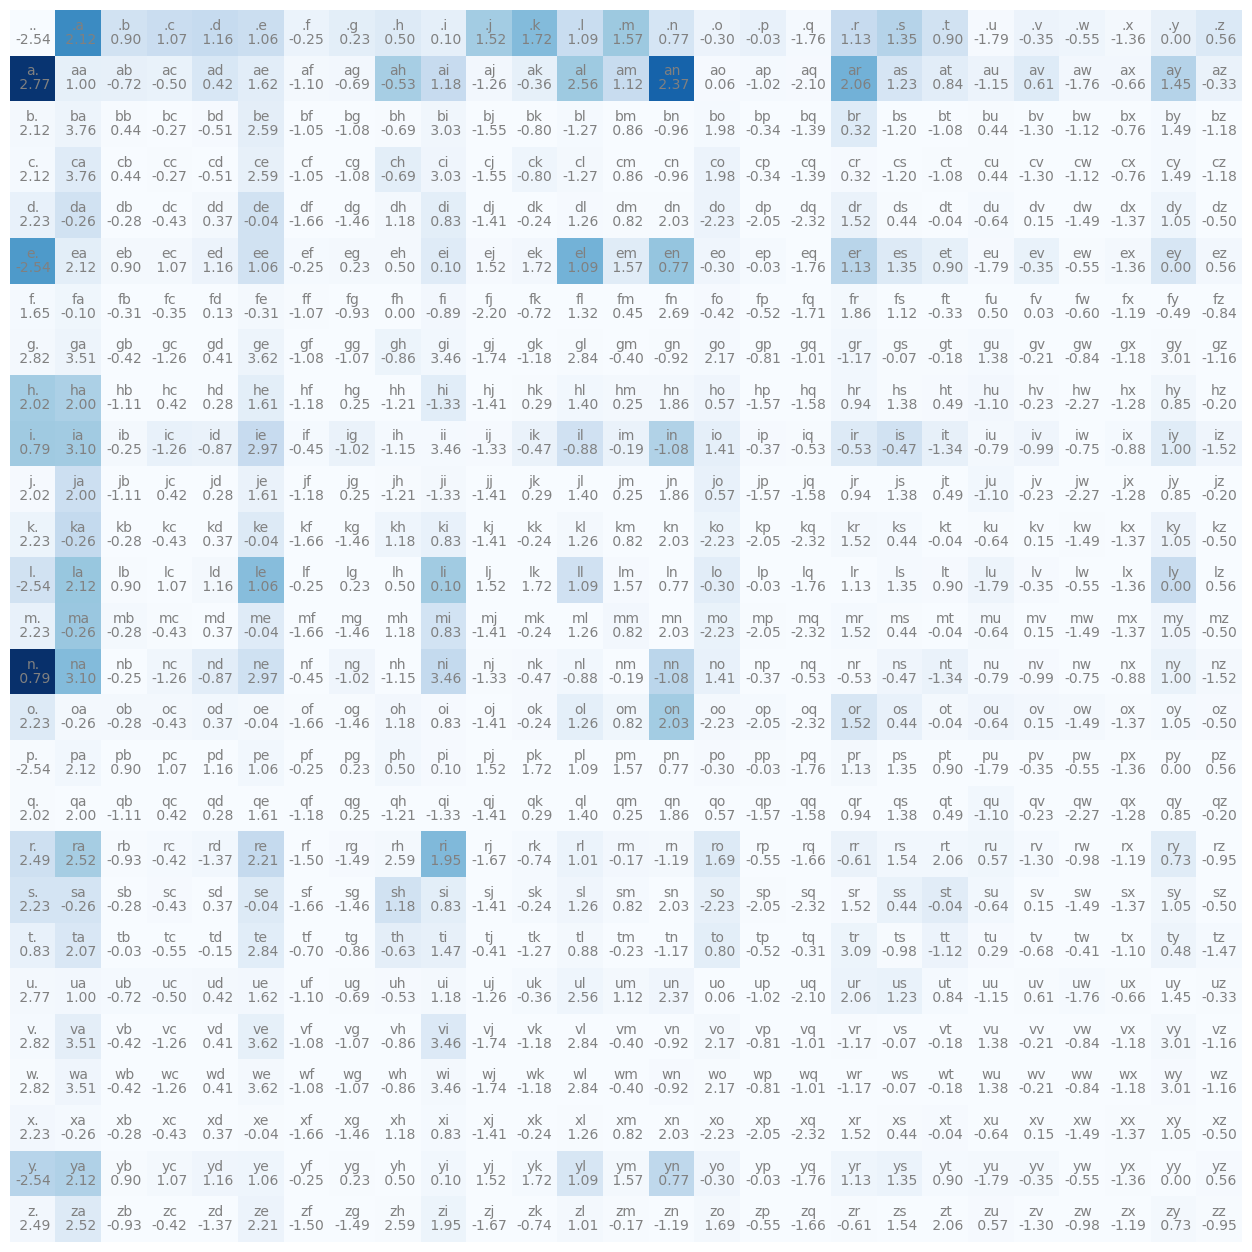

In [38]:
# Counts is equivalent to the matrix N: check the similarity of the plot of counts below and the plot of N above
plt.figure(figsize = (16,16))
plt.imshow(N, cmap = 'Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = "center", va = "bottom", color = 'gray')
        plt.text(j, i, f'{logits[i,j].item(): .2f}', ha = "center", va = "top", color = 'gray')

plt.axis("off")

In [241]:
Wex = W.exp()
Pn = Wex/Wex.sum(1, True)

In [258]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    ix = 0
    str = ''
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes = 27).float() #one-hot encoding of inputs characters
        logits = xenc@W #interpreting outputs of neurons as log-counts of the N matrix
        counts = logits.exp() #equivalent of N matrix
        p = counts / counts.sum(1, True) #equivalent of P matrix
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        str = str + itos[ix]
        if ix == 0:
            break
    print(str)

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


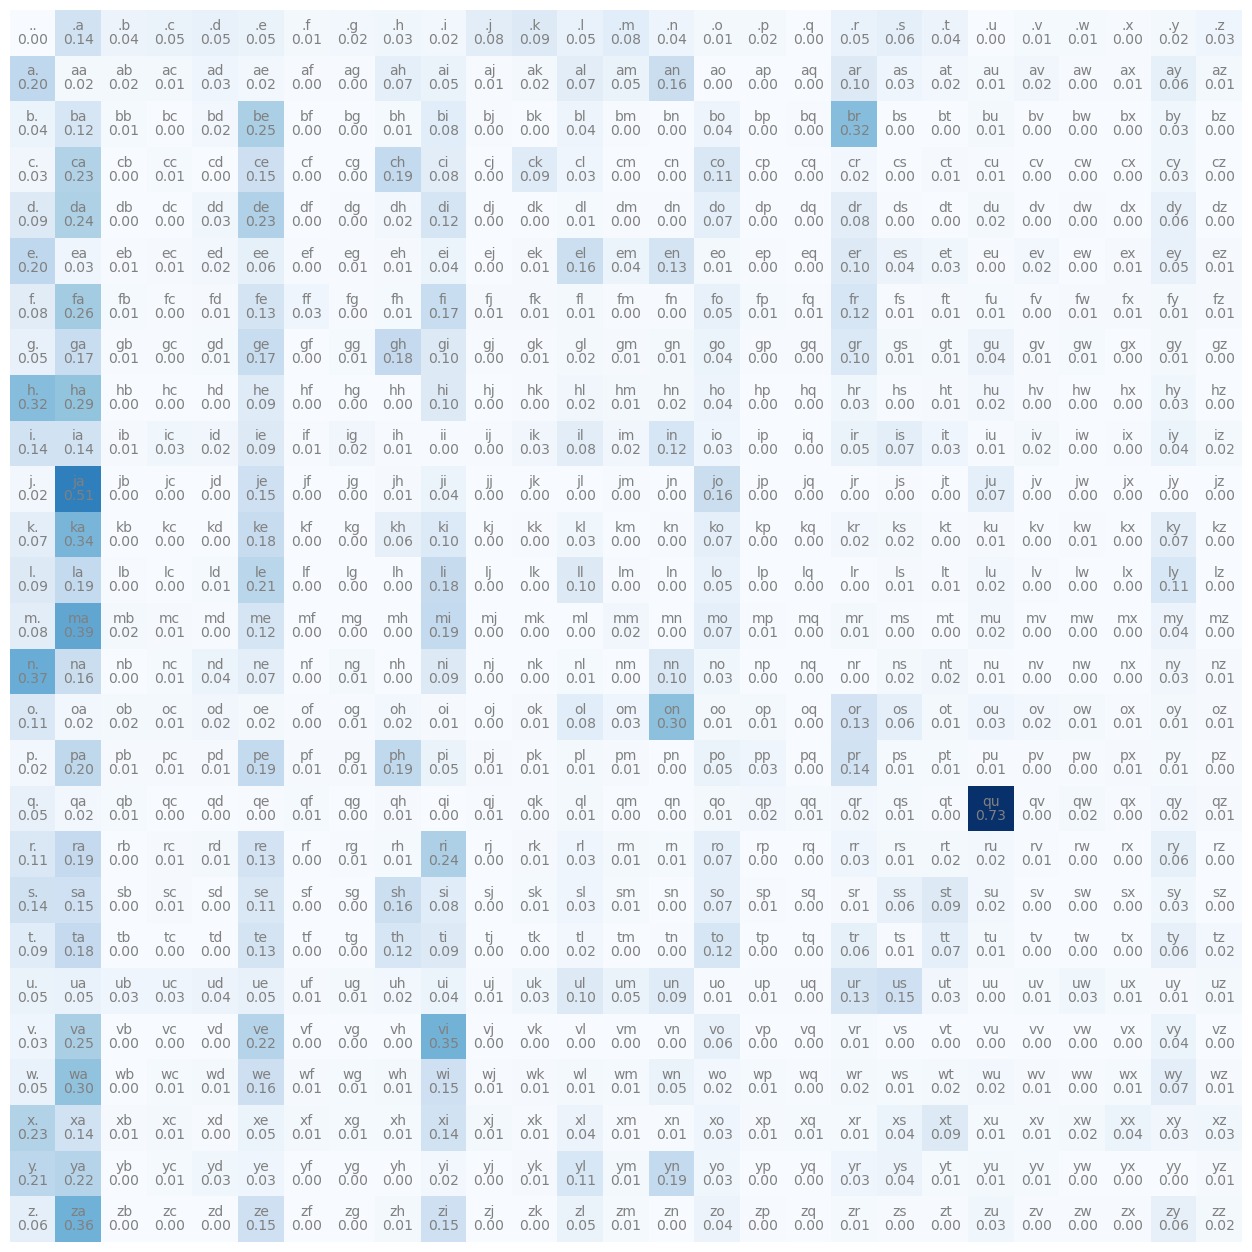

In [264]:
import matplotlib.pyplot as plt

# Assuming Pn is your tensor that requires grad
Pn_detached = Pn.detach()  # Detach the tensor from the computation graph

plt.figure(figsize=(16,16))
plt.imshow(Pn_detached.numpy(), cmap='Blues')  # Convert the detached tensor to numpy for plotting

# Assuming itos is a list or array that maps indices to string characters
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, f'{Pn_detached[i,j].item():.2f}', ha="center", va="top", color='gray')

plt.axis("off")
plt.show()

In [ ]:
# Notes:
# 1. The loss obtained from creating a probability distribution by simply counting the number of times any bigram
#    appears (~2.454) is the theoretical limit of loss that can be achieved by any bigram model.
# 2. Even if you use a neural network to predict the next character given the previous character, the loss cannot be
#    lower than ~2.454 for the given data set.